# Different Layer Depth Experiment

**მიზანი**: შევადარო ერთმანეთს 1 ,3 ,5, 7 Layer CNNs.

**გამოყენებული მოდელები**:
- `one_layer_cnn`
- `three_layer_cnn`
- `five_layer_cnn`
- `seven_layer_cnn`

**მოლოდინი**: 5 Layer cnn-მა უნდა მოგვცეს საუკეთესო შედეგი fitting-ის თვალსაზრისით.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/PURI/')
import torch

Mounted at /content/drive


## 1. იმპორტები

In [ ]:
import torch
import torch.nn as nn
import importlib
import sys
from pathlib import Path

from train_models_temp.helper import (
    set_seed,
    get_device,
    print_model_info,
    display_my_result,
)

from train_models_temp.my_trains import(
        EmotionCNNTrainer,
        run_depth_experiment
)
set_seed(42)
device = get_device()


Seed set to 42
Using GPU: Tesla T4


In [ ]:
!pip install wandb
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: kechik21 (kechik21-free-university-of-tbilisi-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

## 2. მოდელის ბილდინგი

In [ ]:
def build_model(model_name, num_classes=7, input_channels=1):
    try:
        from my_models import conc_model
        model = conc_model(curr_model=model_name, num_classes=num_classes)
        return model
    except Exception as e:
        print(f"Error loading {model_name}: {e}")
        raise

print("Model worked")

Model worked


## 3. Data-ს მიმოხილვა და ლოუდინგი

In [ ]:
from data.my_data_folder.my_data import get_complete_fer_init, show_plots, plot_class_dist

def load_data(batch_size=64, augment_type='none'):
    print("Loading FER2013  dataset...")
    train_loader, val_loader, test_df = get_complete_fer_init(
        batch_size=batch_size,
        num_workers=2,
        augment_type=augment_type
    )
    print("Data loaded correctly")
    print(f"Train size: {len(train_loader)}")
    print(f"Validation size: {len(val_loader)}")
    return train_loader, val_loader


train_loader, val_loader = load_data(batch_size=64)

#£if train_loader is not None:
 #   print("")
  #  print("")
   # print(f"Dataset: {len(train_loader.dataset)} train, {len(val_loader.dataset)} validation samples")
    #print("")
   # print("Images of my data:")
   # print("")
   # show_plots(train_loader, num_samples=8)
   # print("")
   # print("")
   # print("Distribution of train data")
    #print("")
    #plot_class_dist(train_loader, "Distribution of train data")


Loading FER2013  dataset...
 Using FER2013 from MyDrive
Train : 28709
Validation : 3589
Test : 3589
Data loaded correctly
Train size: 449
Validation size: 57


## 4. თრეინინგის მახასიათებლები

In [ ]:
config = {
    'learning_rate': 0.002,
    'num_epochs': 30,
    'patience': 7,
    'device': device,
    'seed': 42,
    'wandb_enabled': True,
    'experiment_name': 'architecture_depth_experiment'
}
print("Training characteristics:")
for k, v in config.items():
    print(f"   {k}: {v}")

Training characteristics:
   learning_rate: 0.002
   num_epochs: 30
   patience: 7
   device: cuda
   seed: 42
   wandb_enabled: True
   experiment_name: architecture_depth_experiment


## 5. მოდელების მახასიათებლების შედარება

In [ ]:
curr_mods = ['1_layer_cnn', '3_layer_cnn', '5_layer_cnn', '7_layer_cnn']
print(f"Working on {len(curr_mods)} models for Phase 1: Architecture Depth")
print("Testing pure architectural effects across different depths")
print("")

model_info = {}
prev_params = 0
for i, model_name in enumerate(curr_mods):
    try:
        from my_models import conc_model
        model = conc_model(curr_model=model_name, num_classes=7)
        total_params, trainable_params = print_model_info(model, model_name)


        if i > 0:  #pirveli modeli tu araa
            growth = total_params - prev_params
            growth_ratio = total_params / prev_params
            print(f"Added {growth:,} parameters ({growth_ratio:.1f}x growth from previous)")
        else:
            print("Basic Model")

        model_info[model_name] = {
            'total_params': total_params,
            'trainable_params': trainable_params,
            'layers': int(model_name.split('_')[0])
        }

        prev_params = total_params
        print()
    except Exception as e:
        print(f"Modeli kvdeba help {model_name}: {e}")
        print("")



Working on 4 models for Phase 1: Architecture Depth
Testing pure architectural effects across different depths

 1_layer_cnn Info:
   Total parameters: 1,181,319
   Trainable parameters: 1,181,319
Basic Model

 3_layer_cnn Info:
   Total parameters: 4,813,319
   Trainable parameters: 4,813,319
Added 3,632,000 parameters (4.1x growth from previous)

 5_layer_cnn Info:
   Total parameters: 11,072,263
   Trainable parameters: 11,072,263
Added 6,258,944 parameters (2.3x growth from previous)

 7_layer_cnn Info:
   Total parameters: 44,306,055
   Trainable parameters: 44,306,055
Added 33,233,792 parameters (4.0x growth from previous)



## 6. ექსპერიმენტი

In [ ]:
trainer = EmotionCNNTrainer(config)
print("")
print("Starting Architecture Depth Experiment...")
results = run_depth_experiment(trainer, train_loader, val_loader, build_model)

Trainer ready for cuda

Starting Architecture Depth Experiment...
Experiment to compare depth

Comparing 4 models...
Training 1_layer_cnn...


wandb: WARNING Using a boolean value for 'reinit' is deprecated. Use 'return_previous' or 'finish_previous' instead.


logging epoch 0
  Epoch   0: Train 39.1%, Val 42.8%
logging epoch 3
  Epoch   3: Train 53.4%, Val 49.8%
logging epoch 6
  Epoch   6: Train 62.6%, Val 49.6%
logging epoch 9
  Epoch   9: Train 71.4%, Val 50.8%
logging epoch 12
  Epoch  12: Train 79.7%, Val 50.6%
logging epoch 15
  Epoch  15: Train 86.7%, Val 48.5%
  Early stopping at epoch 16
1_layer_cnn: 51.6%


accuracy_gap,▁▂▄▅▆█
best_val_acc_so_far,▁▇▇███
learning_rate,▁▁▁▁▁▁
loss_gap,▁▂▃▄▆█
train_accuracy,▁▃▄▆▇█
train_loss,█▆▅▃▂▁
val_accuracy,▁▇▇██▆
val_loss,▂▁▁▂▄█
accuracy_gap,38.21957
best_val_acc_so_far,51.60212
learning_rate,0.002


Training 3_layer_cnn...


logging epoch 0
  Epoch   0: Train 36.2%, Val 43.7%
logging epoch 3
  Epoch   3: Train 62.6%, Val 52.8%
logging epoch 6
  Epoch   6: Train 89.0%, Val 52.4%
logging epoch 9
  Epoch   9: Train 96.7%, Val 51.1%
logging epoch 12
  Epoch  12: Train 97.5%, Val 51.3%
  Early stopping at epoch 15
3_layer_cnn: 53.6%


accuracy_gap,▁▃▇██
best_val_acc_so_far,▁▇███
learning_rate,▁▁▁▁▁
loss_gap,▁▂▅▇█
train_accuracy,▁▄▇██
train_loss,█▅▂▁▁
val_accuracy,▁██▇▇
val_loss,▂▁▃▇█
accuracy_gap,46.16858
best_val_acc_so_far,53.58038
learning_rate,0.002


Training 5_layer_cnn...


logging epoch 0
  Epoch   0: Train 27.2%, Val 34.4%
logging epoch 3
  Epoch   3: Train 52.0%, Val 51.9%
logging epoch 6
  Epoch   6: Train 65.7%, Val 55.6%
logging epoch 9
  Epoch   9: Train 82.8%, Val 54.2%
logging epoch 12
  Epoch  12: Train 91.3%, Val 53.6%
  Early stopping at epoch 14
5_layer_cnn: 55.6%


accuracy_gap,▁▂▄▇█
best_val_acc_so_far,▁▇███
learning_rate,▁▁▁▁▁
loss_gap,▁▁▂▅█
train_accuracy,▁▄▅▇█
train_loss,█▆▄▂▁
val_accuracy,▁▇██▇
val_loss,▃▁▁▄█
accuracy_gap,37.65233
best_val_acc_so_far,55.55865
learning_rate,0.002


Training 7_layer_cnn...


logging epoch 0
  Epoch   0: Train 24.9%, Val 24.5%
logging epoch 3
  Epoch   3: Train 25.1%, Val 24.5%
logging epoch 6
  Epoch   6: Train 25.1%, Val 24.5%
  Early stopping at epoch 8
7_layer_cnn: 24.5%


accuracy_gap,▁██
best_val_acc_so_far,▁▁▁
learning_rate,▁▁▁
loss_gap,▁█▇
train_accuracy,▁██
train_loss,█▁▁
val_accuracy,▁▁▁
val_loss,█▇▁
accuracy_gap,0.63999
best_val_acc_so_far,24.4915
learning_rate,0.002



Final outcome
1. 5 Layer Cnn
   Accuracy: 55.6%
   Params: 11,072,263
   Status: Overfitting

2. 3 Layer Cnn
   Accuracy: 53.6%
   Params: 4,813,319
   Status: Overfitting

3. 1 Layer Cnn
   Accuracy: 51.6%
   Params: 1,181,319
   Status: Overfitting

4. 7 Layer Cnn
   Accuracy: 24.5%
   Params: 44,306,055
   Status: Underfitting

Better model is: 5 Layer Cnn (55.6%)

Full Predictions
X 1 Layer Cnn:
   Predicted: Will severely underfit - too simple
   Reality:   Training accurac მაღალია და სხვაობაც საკმაოდ დიდია

X 3 Layer Cnn:
   Predicted: Will likely underfit - no regularization is bad
   Reality:   Training accurac მაღალია და სხვაობაც საკმაოდ დიდია

X 5 Layer Cnn:
   Predicted: Should show some overfitting without dropout
   Reality:   Training accurac მაღალია და სხვაობაც საკმაოდ დიდია

X 7 Layer Cnn:
   Predicted: Will definitely overfit without regularization
   Reality:   ამჯერად მცირეა სხვაობა, თუმცა მოდელია ზედმეტად მარტივი და უბრალო



## 7. მნინშვნელოვანი საბოლოო პარამეტრები და მათი დალოგვა

In [ ]:
import matplotlib.pyplot as plt
import importlib
import train_models_temp.plotting
importlib.reload(train_models_temp.plotting)

from train_models_temp.plotting import (
    plot_training_curves,
    plot_validation_comparison,
    plot_parameter_effectiveness,
    plot_training_curves,
    plot_model_comparison
)



In [ ]:
# Initialize wandb for summary metrics
wandb.init(project="depth_experiment",
           name="experiment1_results_summary",
           tags=["summary", "architecture_depth", "experiment1"])

trainer_results = trainer.results
all_metrics = {}  # Collect all metrics to log at once

for model_name, result in trainer_results.items():
    overfitting_score = max(0, (result['final_train_acc'] - result['best_val_acc']) / 10)

    chem_metr = {
        "final_train_accuracy": result['final_train_acc'],
        "final_val_accuracy": result['best_val_acc'],
        "final_overfitting_score": overfitting_score,
        "total_parameters": result['parameters'],
        "training_time_minutes": result['training_time'] / 60,
        "epochs_trained": len(result['val_accs']),
        "best_epoch": result['val_accs'].index(max(result['val_accs'])) + 1,
        "model_name": model_name,
        "fit_status": result['actual_results']['fit_status'],
        "performance": result['actual_results']['performance'],
        "efficiency_status": result['actual_results']['efficiency_status'],
        "prediction": result['prediction']['prediction'],
        "reality": result['actual_results']['fit_analysis'],
        "prediction_correct": result['prediction_correct']
    }

    print(" ")
    print(f" {model_name.replace('_', ' ').title()} Results ")
    for key, value in chem_metr.items():
        if key != "model_name":
            print(f"{key.replace('_', ' ').title()}: {value}")

    for key, value in chem_metr.items():
        if key != "model_name":
            wandb_key = f"final_results/{model_name}/{key}"
            all_metrics[wandb_key] = value

wandb.log(all_metrics)

print(" Results processed and logged to wandb")
wandb.finish()

 
 1 Layer Cnn Results 
Final Train Accuracy: 86.7289003448396
Final Val Accuracy: 51.60211758149902
Final Overfitting Score: 3.512678276334058
Total Parameters: 1181319
Training Time Minutes: 8.63121891816457
Epochs Trained: 16
Best Epoch: 9
Fit Status: Overfitting
Performance: Bad performance
Efficiency Status: Normal training speed
Prediction: Will severely underfit - too simple
Reality: Training accurac მაღალია და სხვაობაც საკმაოდ დიდია
Prediction Correct: False
 
 3 Layer Cnn Results 
Final Train Accuracy: 97.76376745968163
Final Val Accuracy: 53.58038450821956
Final Overfitting Score: 4.418338295146207
Total Parameters: 4813319
Training Time Minutes: 8.233057022094727
Epochs Trained: 15
Best Epoch: 8
Fit Status: Overfitting
Performance: Bad performance
Efficiency Status: Normal training speed
Prediction: Will likely underfit - no regularization is bad
Reality: Training accurac მაღალია და სხვაობაც საკმაოდ დიდია
Prediction Correct: False
 
 5 Layer Cnn Results 
Final Train Accuracy

final_results/1_layer_cnn/best_epoch,▁
final_results/1_layer_cnn/epochs_trained,▁
final_results/1_layer_cnn/final_overfitting_score,▁
final_results/1_layer_cnn/final_train_accuracy,▁
final_results/1_layer_cnn/final_val_accuracy,▁
final_results/1_layer_cnn/total_parameters,▁
final_results/1_layer_cnn/training_time_minutes,▁
final_results/3_layer_cnn/best_epoch,▁
final_results/3_layer_cnn/epochs_trained,▁
final_results/3_layer_cnn/final_overfitting_score,▁
final_results/3_layer_cnn/final_train_accuracy,▁


## 8. შედეგების ვიზუალიზაცია და დალოგვა

In [ ]:
from train_models_temp.plotting import (
    plot_model_comparison,
    plot_metrics_over_epochs,
    plot_parameter_effectiveness
)



Working on Stage 1 plots


<Figure size 640x480 with 0 Axes>

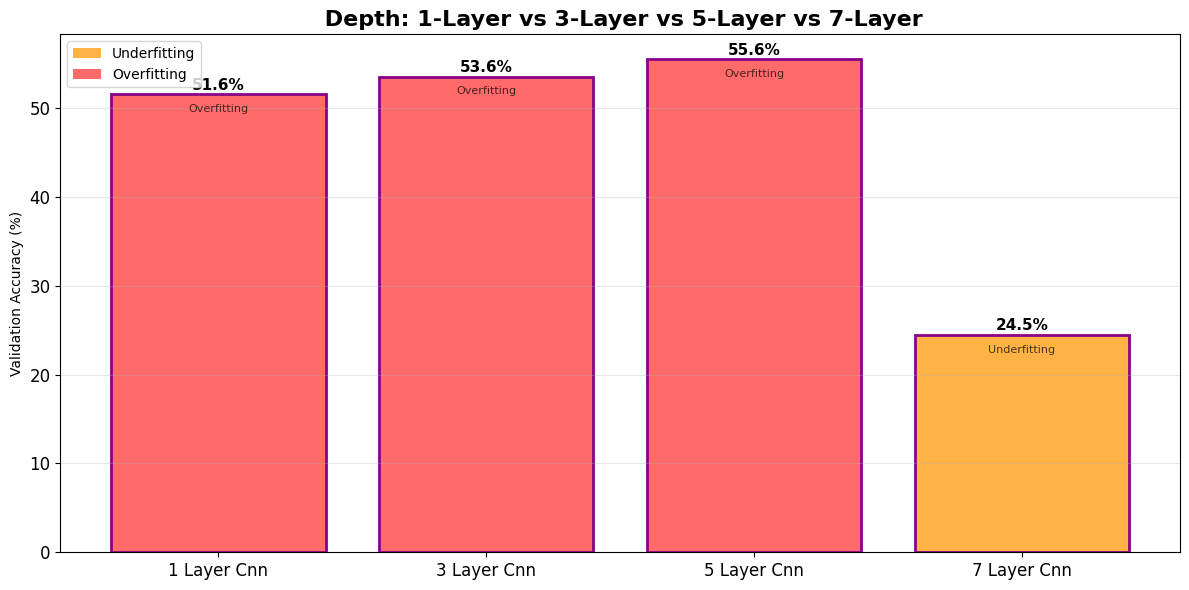

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

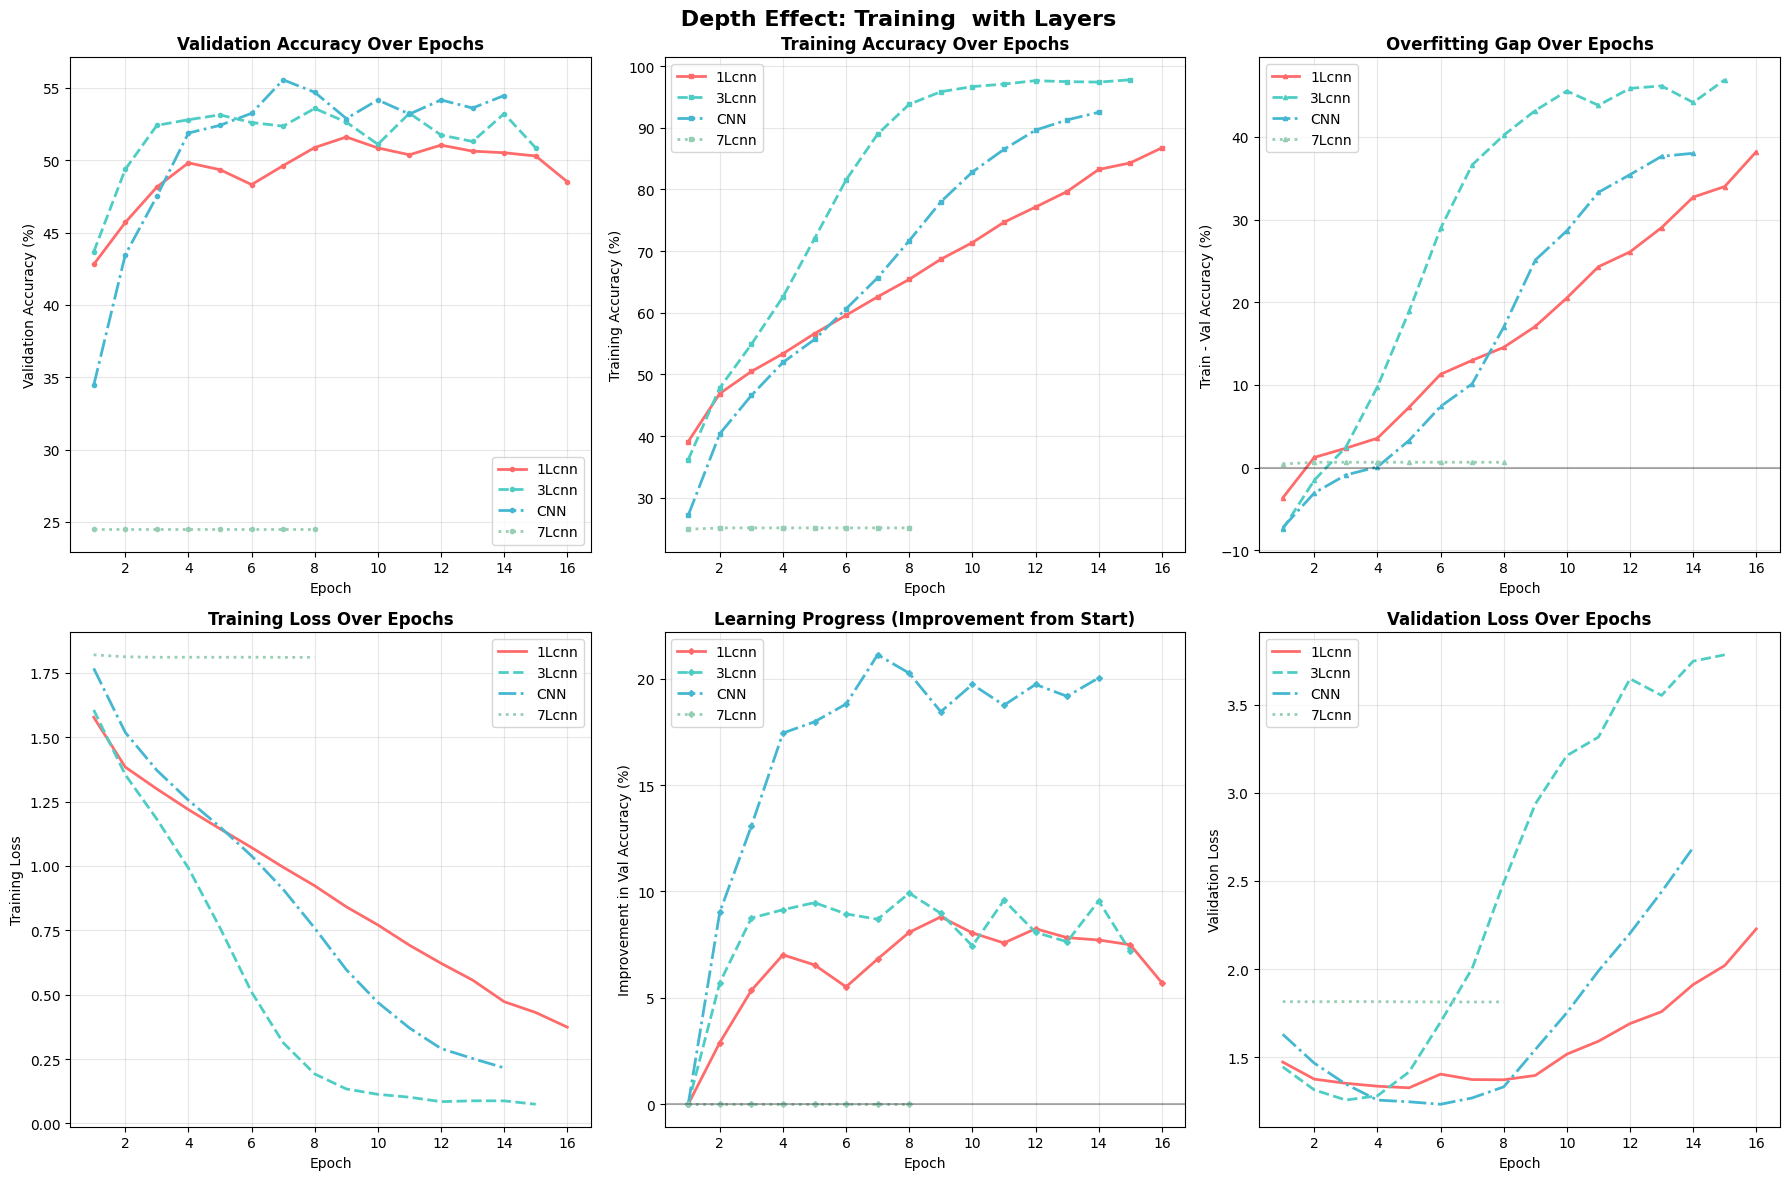

<Figure size 640x480 with 0 Axes>

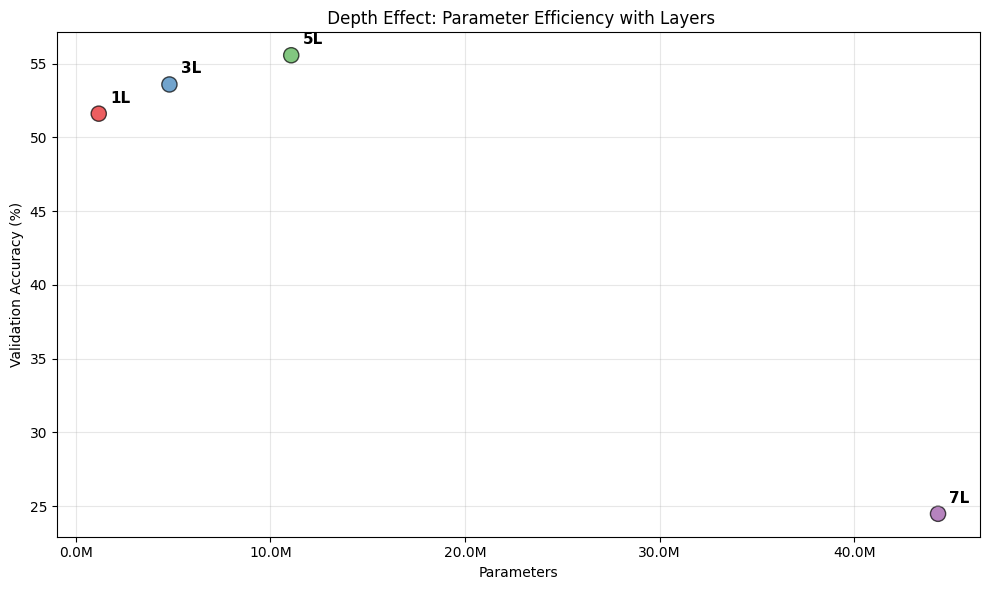

morcha es etapi


In [ ]:
print("Working on Stage 1 plots")

wandb.init(project="depth_experiment",
           name="architecture_depth_summary",
           tags=["summary", "architecture_depth", "stage1"],
           notes="Comparing all architecture depths (1/3/5/7 layers)")

fig1 = plt.figure()
plot_model_comparison(trainer_results, " Depth: 1-Layer vs 3-Layer vs 5-Layer vs 7-Layer")
fig1 = plt.gcf()
wandb.log({"architecture_comparison_bars": wandb.Image(fig1)})
# plt.close()

fig2 = plt.figure()
plot_metrics_over_epochs(trainer_results, " Depth Effect: Training  with Layers")
fig2 = plt.gcf()
wandb.log({"training_dynamics_analysis": wandb.Image(fig2)})
plt.close()

fig3 = plt.figure()
plot_parameter_effectiveness(trainer_results, " Depth Effect: Parameter Efficiency with Layers")
fig3 = plt.gcf()
wandb.log({"parameter_effectiveness_scatter": wandb.Image(fig3)})
plt.close()

print("morcha es etapi")

wandb.finish()

In [ ]:
print("Plotting done ")

Plotting done 


## 9. ჩემი დასკვნა და საბოლოო ანალიზი

In [ ]:

one_layer_result = None
three_layer_result = None
five_layer_result = None
seven_layer_result = None

for model_name, result in trainer_results.items():
    if model_name == '1_layer_cnn':
        one_layer_result = {
            'best_val_acc': result['best_val_acc'],
            'final_train_acc': result['final_train_acc'],
            'total_params': result['parameters']
        }
    elif model_name == '3_layer_cnn':
        three_layer_result = {
            'best_val_acc': result['best_val_acc'],
            'final_train_acc': result['final_train_acc'],
            'total_params': result['parameters']
        }
    elif model_name == '5_layer_cnn':
        five_layer_result = {
            'best_val_acc': result['best_val_acc'],
            'final_train_acc': result['final_train_acc'],
            'total_params': result['parameters']
        }
    elif model_name == '7_layer_cnn':
        seven_layer_result = {
            'best_val_acc': result['best_val_acc'],
            'final_train_acc': result['final_train_acc'],
            'total_params': result['parameters']
        }

all_results = {
    '1-layer': one_layer_result,
    '3-layer': three_layer_result,
    '5-layer': five_layer_result,
    '7-layer': seven_layer_result
}

best_architecture = max(all_results.items(), key=lambda x: x[1]['best_val_acc'])
print("The best model among the layer modifdied cnns is :")
print(best_architecture)

The best model among the layer modifdied cnns is :
('5-layer', {'best_val_acc': 55.558651434940096, 'final_train_acc': 92.49712633668884, 'total_params': 11072263})
